<a href="https://colab.research.google.com/github/smuchaikim/Group-1_Exercise/blob/main/NBA_EDA_with_Pandas_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing pandas library
import pandas as pd

In [2]:
# Loading 'rating zipped file in tsv format' in pandas
ratings = pd.read_csv('title.ratings.tsv.gz', sep='\t')
ratings.to_csv('/content/title_ratings.csv', index=False)

In [3]:
# loading 'basic zipped file in tsv format'and skipping any lines that cause parsing errors
basics = pd.read_csv('title.basics.tsv.gz', sep='\t', engine='python', on_bad_lines='skip')
basics.to_csv('/content/title.basics.csv', index=False)

In [4]:
# Loading 'movie zipped file in tsv format' in pandas
movie = pd.read_csv('bom.movie_gross.csv.gz')
movie.to_csv('/bom.movie_gross.csv', index=False)

In [5]:
# Reading the content in the ratings dataframe
ratings

,tconst,averageRating,numVotes
0,tt0000001,5.7,2165
1,tt0000002,5.5,296
2,tt0000003,6.5,2225
3,tt0000004,5.3,190
4,tt0000005,6.2,2963
...,...,...,...
1595913,tt9916846,5.8,6
1595914,tt9916848,5.8,6
1595915,tt9916850,5.8,6
1595916,tt9916852,5.8,6


In [6]:
# Reading the content in the ' basic' dataframe
basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,Short
...,...,...,...,...,...,...,...,...,...
11797046,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2009,\N,\N,Drama
11797047,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,Drama
11797048,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,Drama
11797049,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short


In [7]:
# Reading the content in the 'movie' dataframe
movie

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


# Inspect the content in each dataframe and Clean the Data

In [9]:
ratings.columns

Index(['tconst', 'averageRating', 'numVotes'], dtype='object')

In [10]:
basics.columns

Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'endYear', 'runtimeMinutes', 'genres'],
      dtype='object')

In [11]:
movie.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

# checking for nulls(missing values in each dataframe)

In [12]:
# No missing values on the 'rating dataframe'
ratings.isnull().sum()

,0
tconst,0
averageRating,0
numVotes,0


In [13]:
#Missing values on the 'primaryTitle and originalTitle'
basics.isnull().sum()

,0
tconst,0
titleType,0
primaryTitle,20
originalTitle,20
isAdult,0
startYear,0
endYear,0
runtimeMinutes,0
genres,0


# Recommendation: Drop them

In [14]:
basics = basics.dropna(subset=['primaryTitle'])
basics.isnull().sum()

,0
tconst,0
titleType,0
primaryTitle,0
originalTitle,0
isAdult,0
startYear,0
endYear,0
runtimeMinutes,0
genres,0


# 5 movies are missing the studio name.
# 28 entries have no domestic gross reported.
# A very large number of movies lack foreign gross. This is significant.

In [ ]:
movie.isnull().sum()

,0
title,0
studio,5
domestic_gross,28
foreign_gross,1350
year,0


In [15]:
 # Filling the 'studio' missing values with "Unknown" if needed for grouping:
 movie['studio'] = movie['studio'].fillna('Unknown')
 # Filling the 'domestic_gross' 28 rows with 0.
 movie['domestic_gross'] = movie['domestic_gross'].fillna(0)
 # Over 1,350 entries have no foreign gross data and treating missing as zero:
 movie['foreign_gross'] = movie['foreign_gross'].fillna(0)
 movie.isnull().sum()


,0
title,0
studio,0
domestic_gross,0
foreign_gross,0
year,0


# Merging the Files




In [16]:
# Merge ratings with basics using tconst
df = pd.merge(ratings, basics, on='tconst', how='inner')
df

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,5.7,2165,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,5.5,296,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,6.5,2225,short,Poor Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance"
3,tt0000004,5.3,190,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,6.2,2963,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,Short
...,...,...,...,...,...,...,...,...,...,...,...
1595611,tt9916846,5.8,6,tvEpisode,Episode #3.18,Episode #3.18,0,2009,\N,\N,Drama
1595612,tt9916848,5.8,6,tvEpisode,Episode #3.17,Episode #3.17,0,2009,\N,\N,Drama
1595613,tt9916850,5.8,6,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,Drama
1595614,tt9916852,5.8,6,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,Drama


In [18]:
# Merge the result with movie
 # Converting  all characters in the 'primaryTitle' strings to lowercase.
df['primaryTitle'] = df['primaryTitle'].str.lower().str.strip()
 # converting all characters in the title to lowercase
movie['title'] = movie['title'].str.lower().str.strip()
 # Now merging the 3 dataframes into one merged_df
merged_df = pd.merge(df, movie, left_on='primaryTitle', right_on='title', how='inner')
# Checking the 5 first rows of the merged_df
merged_df.head()

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,title,studio,domestic_gross,foreign_gross,year
0,tt0000308,5.2,160,short,the house that jack built,The House That Jack Built,0,1900,\N,1,Short,the house that jack built,IFC,88000.0,0,2018
1,tt0000833,6.4,840,short,the country doctor,The Country Doctor,0,1909,\N,14,"Drama,Short",the country doctor,Distrib.,8500.0,0,2017
2,tt0001144,5.3,54,short,the call,The Call,0,1910,\N,11,"Drama,Short",the call,TriS,51900000.0,16700000,2013
3,tt0001284,4.9,58,short,the lesson,The Lesson,0,1910,\N,17,"Drama,Short",the lesson,FM,9000.0,0,2015
4,tt0002287,6.0,16,short,just like a woman,Just Like a Woman,0,1912,\N,17,"Romance,Short",just like a woman,Cohen,11400.0,0,2013


In [20]:
# Checking the last 5 rows of the merged_df
merged_df.tail()

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,title,studio,domestic_gross,foreign_gross,year
13757,tt9903960,6.4,18,tvEpisode,no escape,No Escape,0,2019,\N,\N,"Horror,Mystery,Thriller",no escape,Wein.,27300000.0,27100000,2015
13758,tt9906218,7.7,24,movie,unstoppable,Unstoppable,0,2019,\N,84,Documentary,unstoppable,Fox,81600000.0,86200000,2010
13759,tt9909638,7.7,8,tvEpisode,catfish,Catfish,0,2017,\N,\N,Comedy,catfish,Rog.,3200000.0,242000,2010
13760,tt9910038,8.7,21,tvEpisode,the salesman,The Salesman,0,2015,\N,\N,Comedy,the salesman,Cohen,2400000.0,0,2017
13761,tt9910742,7.0,6,tvEpisode,pitch perfect,Pitch Perfect,0,2016,\N,\N,Comedy,pitch perfect,Uni.,65000000.0,50300000,2012


In [ ]:
# Cleaning merged_df
  # cleaning and standardizing the column names by removing any  spaces in each column/converting column names to lowercase

merged_df.columns = merged_df.columns.str.strip().str.lower().str.replace(' ', '_')

Basic Exploration of the merged_df

In [ ]:
# Merged_df  has 13,762 rows, 16 columns and has no missing values
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13762 entries, 0 to 13761
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          13762 non-null  object 
 1   averagerating   13762 non-null  float64
 2   numvotes        13762 non-null  int64  
 3   titletype       13762 non-null  object 
 4   primarytitle    13762 non-null  object 
 5   originaltitle   13762 non-null  object 
 6   isadult         13762 non-null  object 
 7   startyear       13762 non-null  object 
 8   endyear         13762 non-null  object 
 9   runtimeminutes  13762 non-null  object 
 10  genres          13762 non-null  object 
 11  title           13762 non-null  object 
 12  studio          13762 non-null  object 
 13  domestic_gross  13762 non-null  float64
 14  foreign_gross   13762 non-null  object 
 15  year            13762 non-null  int64  
dtypes: float64(2), int64(2), object(12)
memory usage: 1.7+ MB


# Key Points
 1. IMDb Ratings Are Slightly Skewed High with;
    Average rating: ~6.92
    Median rating: 7.1 showing ratings are not uniformly distributed.
    Most movies fall between 6.2 and 7.8
 2. Number of Votes Is Extremely Skewed
    Median: 76.5 votes
    Mean: ~20,000 votes
    Max: 2.7 million votes — huge!
 3. Domestic Gross Is Heavily Skewed
    Median domestic gross: ~$4.9M
    Mean: ~$39M
    Max: $936M (likely top hits like The Force Awakens and Avengers)
    25% of movies earned <$155K, which shows:
     Many movies are small indies or limited releases
     Revenue distribution is right-skewed, with a few massive earners.
 4. Year Range Is Balanced (2010–2018)
    Spread across 9 years
    Median year is 2014

# The histogram  showing the distribution of IMDb votes across movies
    Skewed Distribution:The distribution is heavily right-skewed, meaning most movies receive relatively few votes, and only a small number receive a very large number of votes.
    
    Most movies on IMDb get little attention

In [28]:
# Importing necessary libralies for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

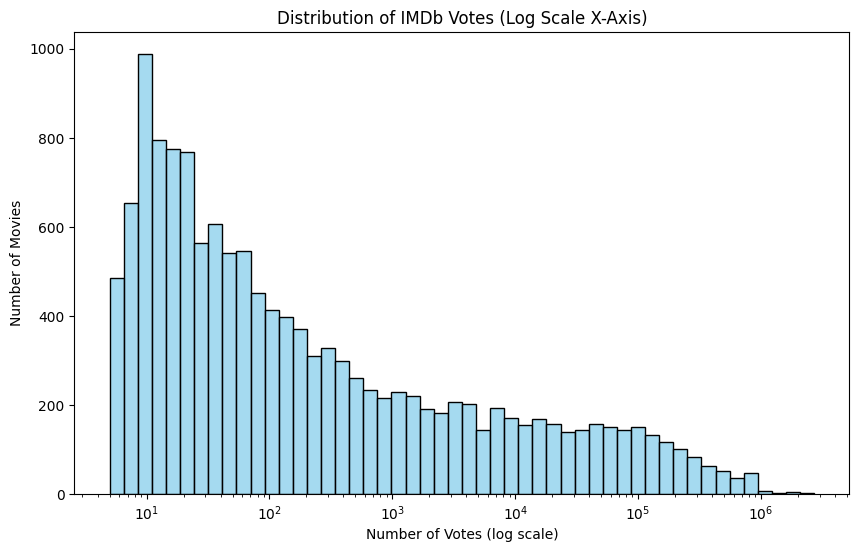

In [35]:

plt.figure(figsize=(10, 6))
sns.histplot(data=merged_df, x='numvotes', bins=50, log_scale=(True, False), color='skyblue')
plt.title('Distribution of IMDb Votes (Log Scale X-Axis)')
plt.xlabel('Number of Votes (log scale)')
plt.ylabel('Number of Movies')
plt.show()

Scatterplot of showing the relationship between Vote with Domestic_gross showing;

*   There is a loose upward pattern, movies with more votes tend to have higher domestic gross revenue.
*   High-grossing movies tend to reach more audiences




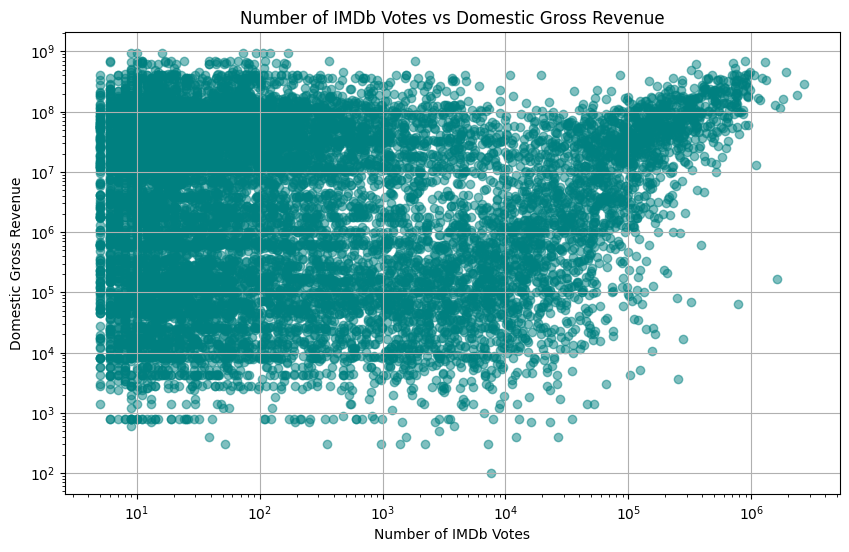

In [67]:

plt.figure(figsize=(10,6))
plt.scatter(merged_df['numVotes'], merged_df['domestic_gross'], alpha=0.5, color='teal')
plt.xlabel('Number of IMDb Votes')
plt.ylabel('Domestic Gross Revenue')
plt.title('Number of IMDb Votes vs Domestic Gross Revenue')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()

A line plot showing the average domestic gross by year for the last 10 years (2010–2018).


*   The average domestic gross steadily increases from 2016 to 2018, peaking in 2018 at over $50 million.
*   The two lowest years was 2011 and 2012



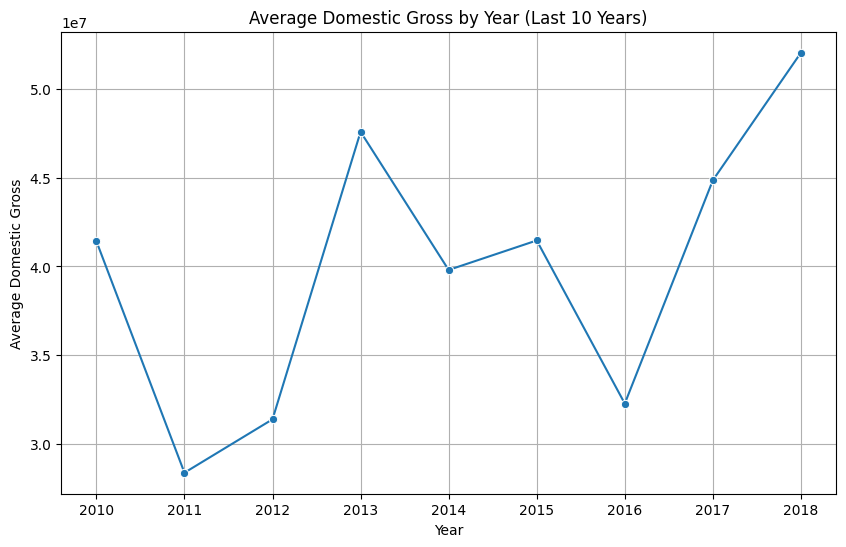

In [73]:
last10_years = merged_df[merged_df['year'] >= merged_df['year'].max() - 9]
year_summary = last10_years.groupby('year')['domestic_gross'].agg(['mean', 'count']).reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=year_summary, x='year', y='mean', marker='o')
plt.xlabel('Year')
plt.ylabel('Average Domestic Gross')
plt.title('Average Domestic Gross by Year (Last 10 Years)')
plt.grid(True)
plt.show()

1. Top 10 Highest Rated Movies

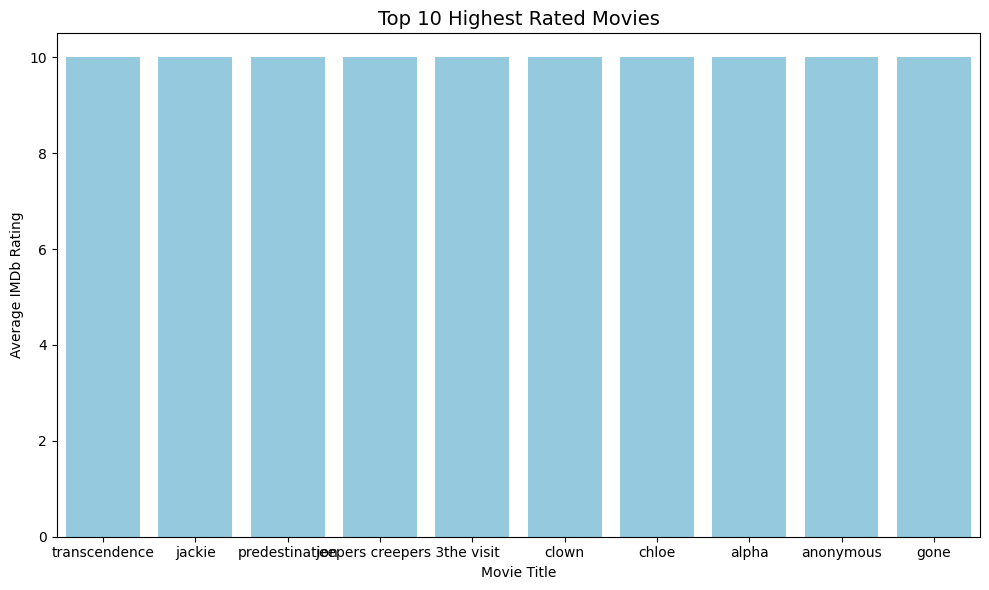

In [41]:
top_rated = merged_df.sort_values(by='averageRating', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(
    y='averageRating',
    x='primaryTitle',
    data=top_rated,
    color='skyblue'
)
plt.title('Top 10 Highest Rated Movies', fontsize=14)
plt.ylabel('Average IMDb Rating')
plt.xlabel('Movie Title')

plt.tight_layout()
plt.show()

In [74]:

merged_df['averageRating'].value_counts(10)

,proportion
averageRating,
7.4,0.038221
7.2,0.038221
7.6,0.036913
7.3,0.036550
7.8,0.036259
...,...
1.4,0.000145
1.1,0.000145
2.4,0.000073


In [75]:
top10 = merged_df.sort_values('averageRating', ascending=False).head(10)
print(top10[['primaryTitle', 'averageRating']])

             primaryTitle  averageRating
7194        transcendence           10.0
8072               jackie           10.0
8321       predestination           10.0
7985   jeepers creepers 3           10.0
8078            the visit           10.0
7833                clown           10.0
12761               chloe           10.0
12306               alpha           10.0
1642            anonymous           10.0
10354                gone           10.0


2. Top 3 Movies by Worldwide Gross



In [46]:
merged_df['foreign_gross'] = pd.to_numeric(merged_df['foreign_gross'], errors='coerce')
merged_df['domestic_gross'] = merged_df['domestic_gross'].fillna(0)
merged_df['foreign_gross'] = merged_df['foreign_gross'].fillna(0)
merged_df['worldwide_gross'] = merged_df['domestic_gross'] + merged_df['foreign_gross']

/tmp/ipython-input-1777869736.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='worldwide_gross', x='primaryTitle', data=top_gross, palette='magma')


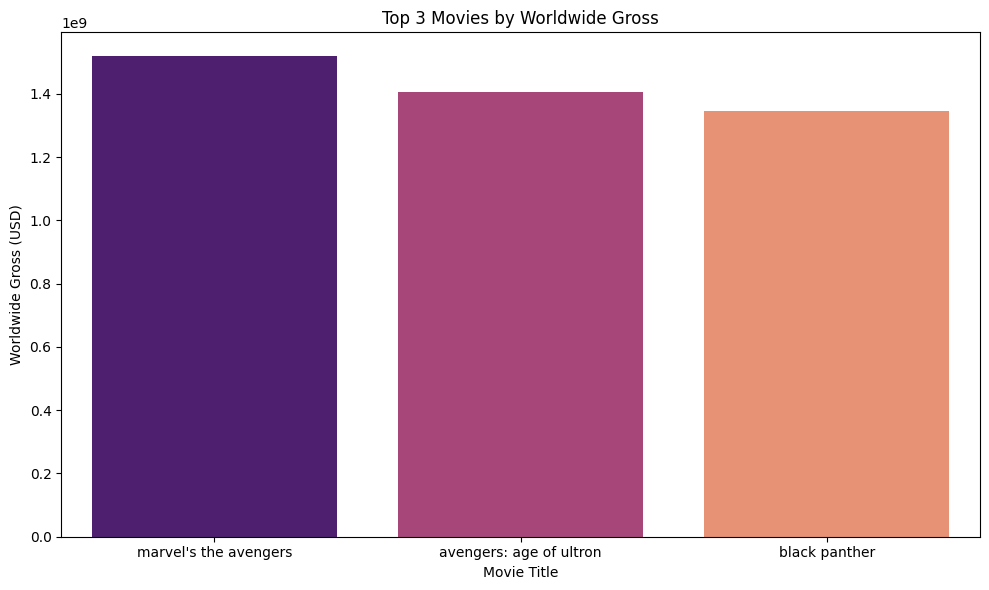

In [48]:
top_gross = merged_df.sort_values(by='worldwide_gross', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(y='worldwide_gross', x='primaryTitle', data=top_gross, palette='magma')
plt.title('Top 3 Movies by Worldwide Gross')
plt.ylabel('Worldwide Gross (USD)')
plt.xlabel('Movie Title')
plt.tight_layout()
plt.show()

3. The relationship of  Rating vs. Revenue

   **Key Insights from the Plot:**

*   There is no strong linear relationship between IMDb rating and worldwide gross.
*   Some low-rated movies still made a lot of money, and some high-rated ones didn’t, indicating other factors that influence gross more than ratings.


*   High-Grossing Movies Cluster Between Ratings 6–8.
 1. With most of the biggest earners (tallest bubbles) have ratings in
the 6–8 range.
NB; The larger, darker bubbles (more votes) tend to be clustered in the 7–8.5 rating zone.
 2. Also we have very few movies with ratings below 5 earn over $500M — indicating quality still plays a role, but not an extreme one.
 Also note that we have very low ratings but decent gross — possibly due to marketing or brand name.



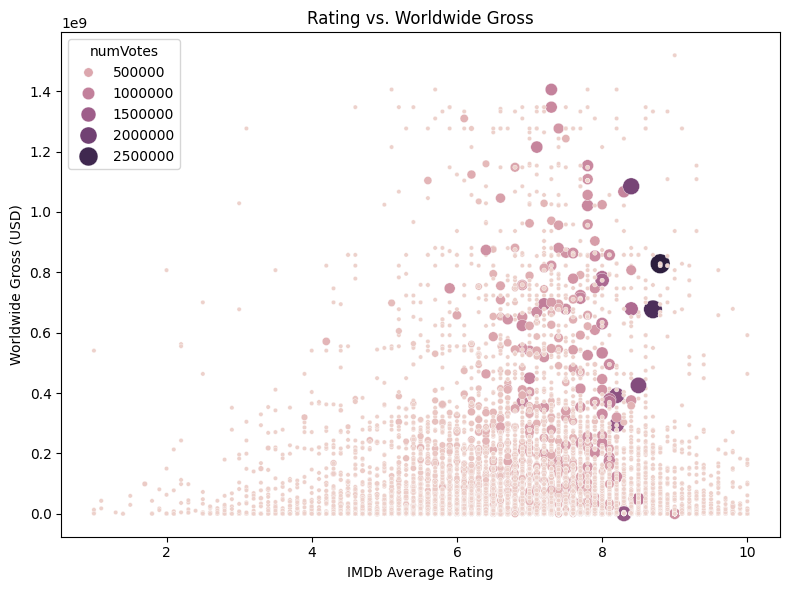

In [52]:

plt.figure(figsize=(8,6))
sns.scatterplot(data=merged_df, x='averageRating', y='worldwide_gross', hue='numVotes', size='numVotes', sizes=(10, 200))
plt.title('Rating vs. Worldwide Gross')
plt.xlabel('IMDb Average Rating')
plt.ylabel('Worldwide Gross (USD)')
plt.tight_layout()
plt.show()

4. Average Rating by Genre

In [57]:
# Create a new dataframe to analyze genres
df_genre = merged_df.copy()
df_genre['genres'] = df_genre['genres'].str.split(',')
df_genre = df_genre.explode('genres')
df_genre.head()

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,title,studio,domestic_gross,foreign_gross,year,worldwide_gross
0,tt0000308,5.2,160,short,the house that jack built,The House That Jack Built,0,1900,\N,1,Short,the house that jack built,IFC,88000.0,0.0,2018,88000.0
1,tt0000833,6.4,840,short,the country doctor,The Country Doctor,0,1909,\N,14,Drama,the country doctor,Distrib.,8500.0,0.0,2017,8500.0
1,tt0000833,6.4,840,short,the country doctor,The Country Doctor,0,1909,\N,14,Short,the country doctor,Distrib.,8500.0,0.0,2017,8500.0
2,tt0001144,5.3,54,short,the call,The Call,0,1910,\N,11,Drama,the call,TriS,51900000.0,16700000.0,2013,68600000.0
2,tt0001144,5.3,54,short,the call,The Call,0,1910,\N,11,Short,the call,TriS,51900000.0,16700000.0,2013,68600000.0


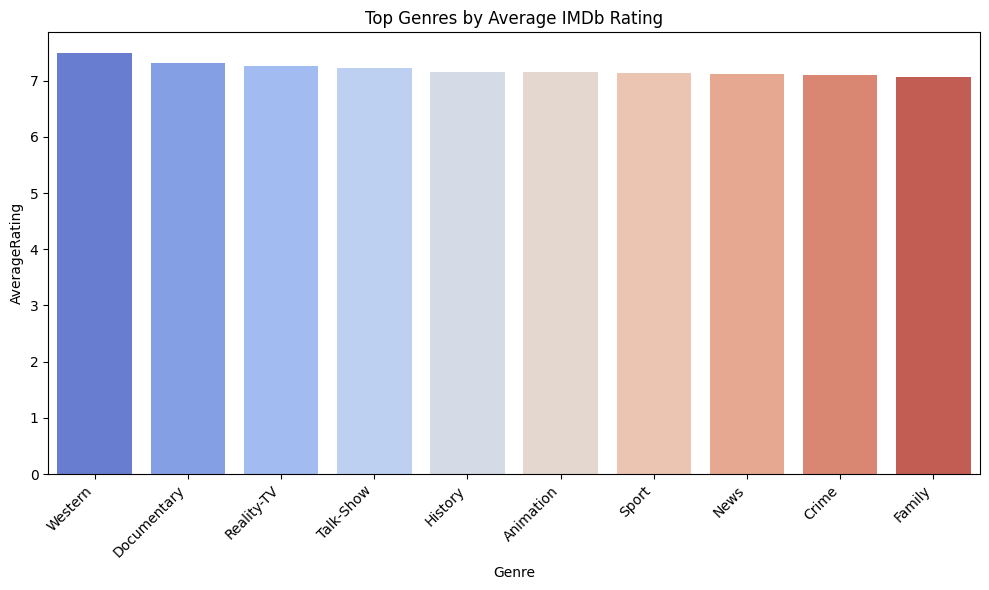

In [65]:
# visualizing with a barplot
genre_rating = df_genre.groupby('genres')['averageRating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(y=genre_rating.values, x=genre_rating.index, hue=genre_rating.index, palette='coolwarm', legend=False)
plt.title('Top Genres by Average IMDb Rating')
plt.ylabel('AverageRating')
plt.xlabel('Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

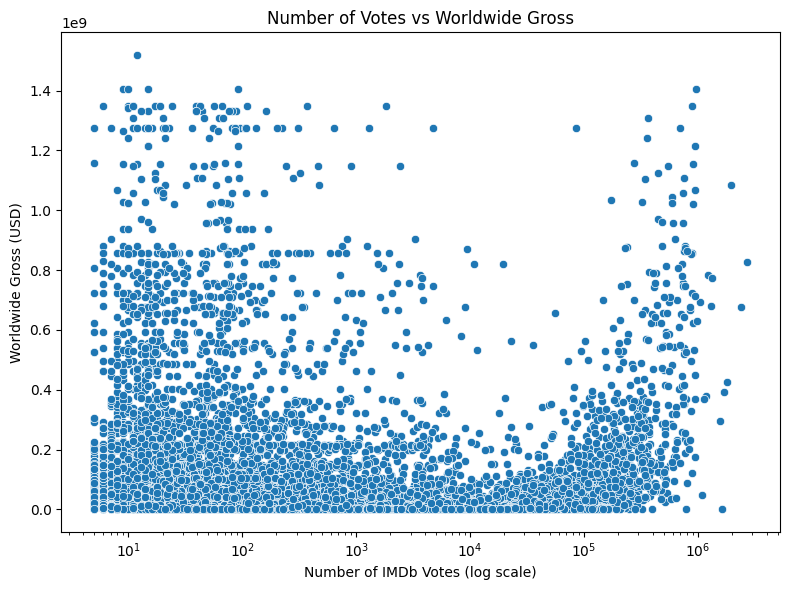

In [64]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='numVotes', y='worldwide_gross', data=merged_df)
plt.xscale('log')  # votes often skewed
plt.title('Number of Votes vs Worldwide Gross')
plt.xlabel('Number of IMDb Votes (log scale)')
plt.ylabel('Worldwide Gross (USD)')
plt.tight_layout()
plt.show()